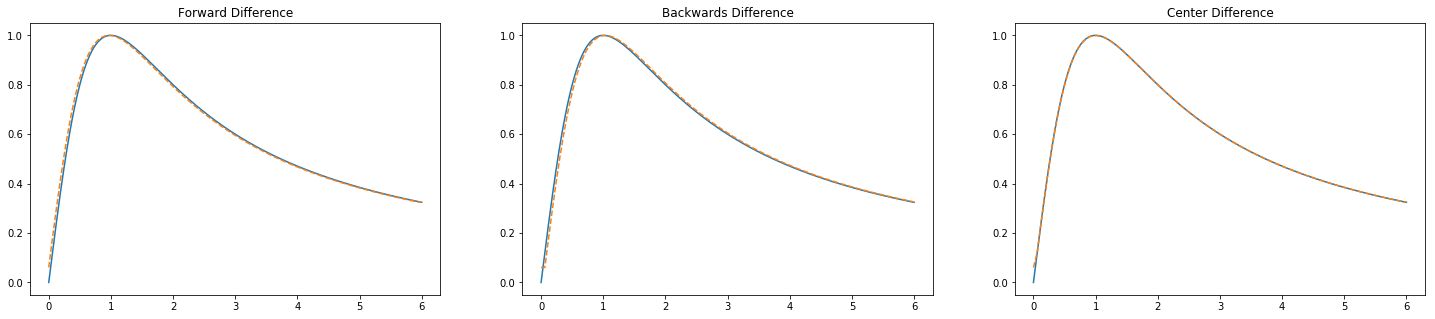

In [57]:
import numpy as np
from pylab import *
import time

'''
These are the brainless way to calculate numerical derivatives. They
work well for very smooth data. they are surprisingly fast even up to
10000 points in the vector.
'''

a = 0
b = 6
N = int(1/.01) # STEP SIZE

x = np.linspace(a,b,N)
y = np.log(1+x**2)
x_dy = np.linspace(a,b,1000)
dy_analytical = (2*x_dy)/(1+x_dy**2)


'''
lets use a forward difference method:
that works up until the last point, where there is not
a forward difference to use. there, we use a backward difference.
'''

plt.figure(figsize=(25,5))


tf1 = time.time()
dyf = [0.0]*len(x)
for i in range(len(y)-1):
    dyf[i] = (y[i+1] - y[i])/(x[i+1]-x[i])
#set last element by backwards difference
dyf[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

plt.subplot(1,3,1)
plt.title("Forward Difference")
plt.plot(x_dy,dy_analytical,label='derivative')
plt.plot(x,dyf,'--',label='forward')

'''and now a backwards difference'''
tb1 = time.time()
dyb = [0.0]*len(x)
#set first element by forward difference
dyb[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)):
    dyb[i] = (y[i] - y[i-1])/(x[i]-x[i-1])

plt.subplot(1,3,2)
plt.title("Backwards Difference")
plt.plot(x_dy,dy_analytical,label='derivative')
plt.plot(x,dyb,'--',label='backward')

    
'''and now, a centered formula'''
tc1 = time.time()
dyc = [0.0]*len(x)
dyc[0] = (y[0] - y[1])/(x[0] - x[1])
for i in range(1,len(y)-1):
    dyc[i] = (y[i+1] - y[i-1])/(x[i+1]-x[i-1])
dyc[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

plt.subplot(1,3,3)
plt.title("Center Difference")
plt.plot(x_dy,dy_analytical,label='derivative')
plt.plot(x,dyc,'--',label='Center Difference')


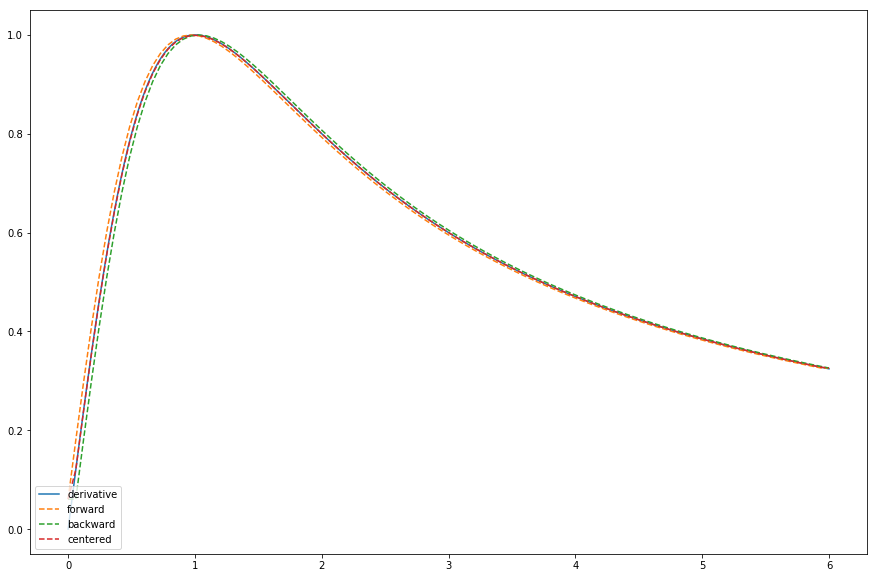

In [58]:
'''
the centered formula is the most accurate formula here
'''
plt.figure(figsize=(15,10))
plt.plot(x_dy,dy_analytical,label='derivative')
plt.plot(x,dyf,linestyle="dashed",label='forward')
plt.plot(x,dyb,linestyle="dashed",label='backward')
plt.plot(x,dyc,linestyle="dashed",label='centered')

plt.legend(loc='lower left')
plt.show()